In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('EV_Predictive_Maintenance_Dataset.csv')
print(f"Dataset: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"SoH range: {df['SoH'].min():.4f} to {df['SoH'].max():.4f}")

Dataset: 175,393 rows × 30 columns
SoH range: 0.4000 to 1.0000


In [3]:
# Check correlation of ALL features with SoH (exclude non-numeric columns)
numeric_df = df.select_dtypes(include=[np.number])
correlations = numeric_df.corr()['SoH'].sort_values(ascending=False)
print("="*60)
print("Correlation of ALL features with SoH:")
print("="*60)
print(correlations)
print("\n" + "="*60)
print(f"Features with |correlation| > 0.5: {(abs(correlations) > 0.5).sum() - 1}")  # -1 to exclude SoH itself
print(f"Features with |correlation| > 0.3: {(abs(correlations) > 0.3).sum() - 1}")
print(f"Features with |correlation| > 0.1: {(abs(correlations) > 0.1).sum() - 1}")

Correlation of ALL features with SoH:
SoH                       1.000000
Charge_Cycles             0.004460
Tire_Pressure             0.004245
Load_Weight               0.003589
Ambient_Humidity          0.003324
Motor_Temperature         0.002424
Brake_Pad_Wear            0.002280
Motor_Torque              0.001495
Reg_Brake_Efficiency      0.001095
RUL                       0.000747
Motor_Vibration           0.000680
SoC                       0.000553
Idle_Time                 0.000124
Battery_Current           0.000005
Distance_Traveled        -0.000025
Suspension_Load          -0.000153
Battery_Voltage          -0.000204
Power_Consumption        -0.000229
Route_Roughness          -0.000594
Driving_Speed            -0.000655
Ambient_Temperature      -0.001210
TTF                      -0.001294
Motor_RPM                -0.001578
Maintenance_Type         -0.001766
Brake_Pressure           -0.002001
Battery_Temperature      -0.002590
Component_Health_Score   -0.002730
Failure_Probabili

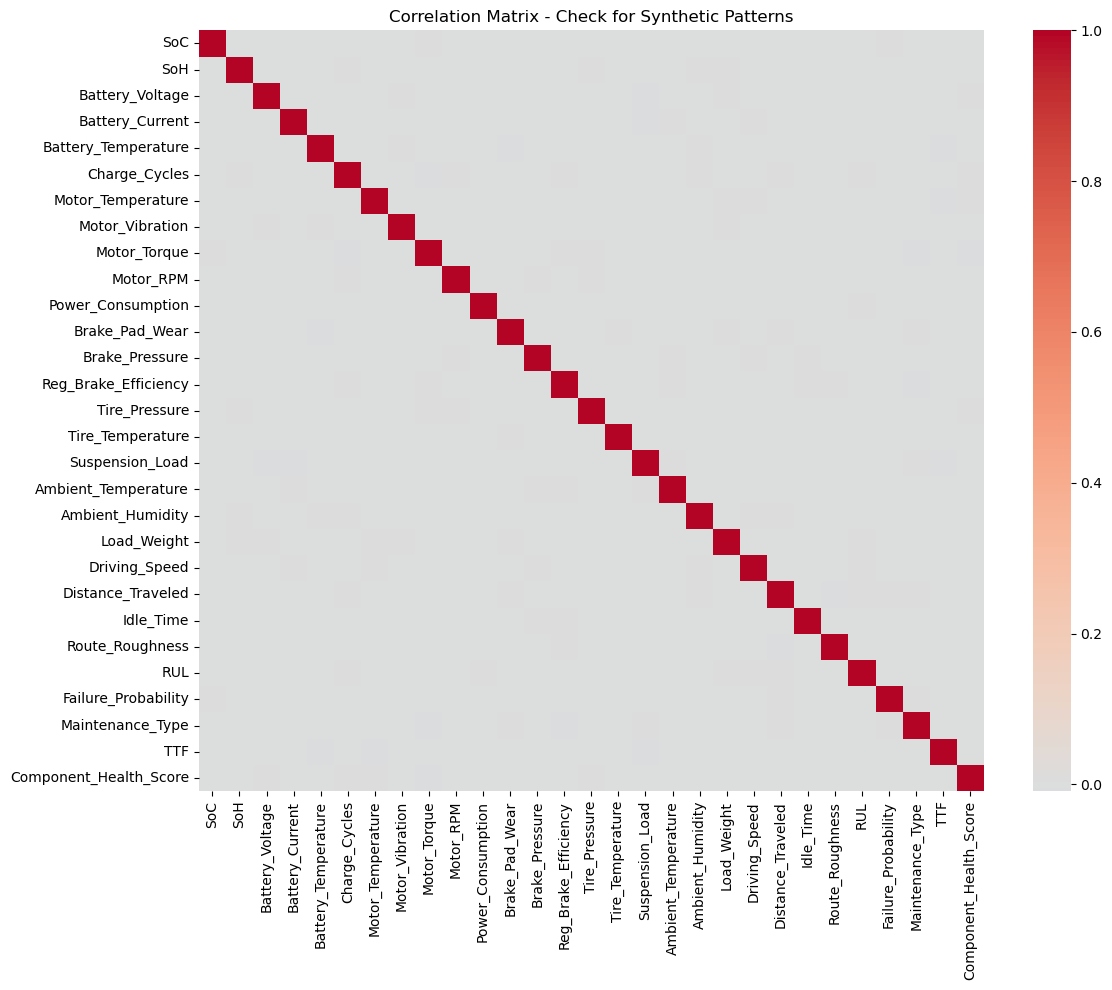

In [4]:
# Visualize correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt='.2f')
plt.title('Correlation Matrix - Check for Synthetic Patterns')
plt.tight_layout()
plt.show()

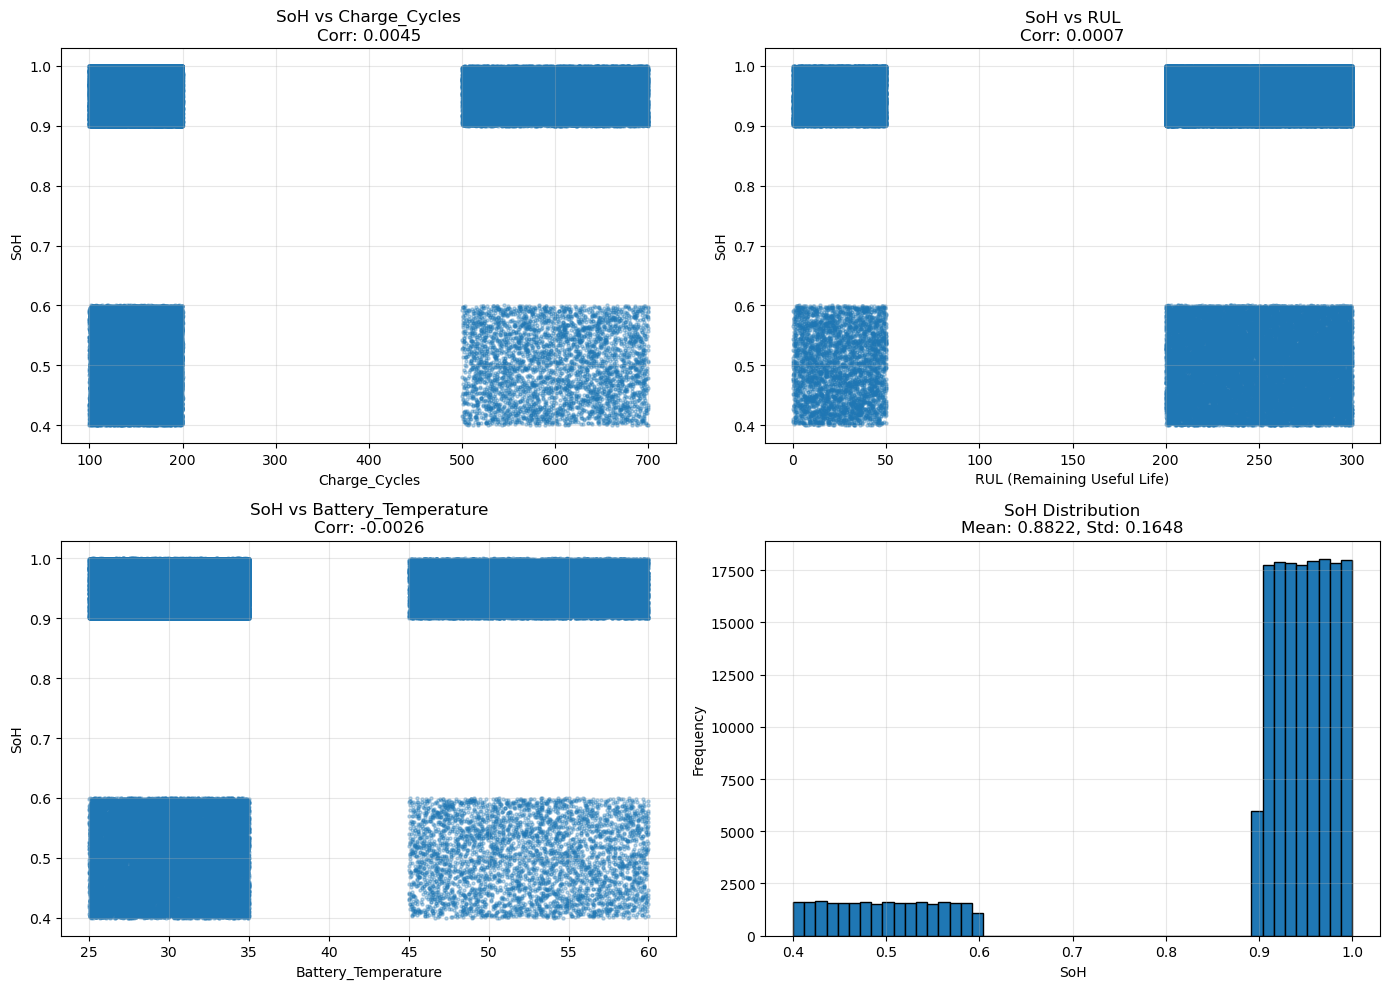

In [5]:
# Check key relationships that SHOULD exist in real EV data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# SoH vs Charge_Cycles (MUST be negatively correlated in real data)
axes[0, 0].scatter(df['Charge_Cycles'], df['SoH'], alpha=0.3, s=5)
axes[0, 0].set_xlabel('Charge_Cycles')
axes[0, 0].set_ylabel('SoH')
axes[0, 0].set_title(f'SoH vs Charge_Cycles\nCorr: {df["Charge_Cycles"].corr(df["SoH"]):.4f}')
axes[0, 0].grid(True, alpha=0.3)

# SoH vs RUL (should be highly correlated)
axes[0, 1].scatter(df['RUL'], df['SoH'], alpha=0.3, s=5)
axes[0, 1].set_xlabel('RUL (Remaining Useful Life)')
axes[0, 1].set_ylabel('SoH')
axes[0, 1].set_title(f'SoH vs RUL\nCorr: {df["RUL"].corr(df["SoH"]):.4f}')
axes[0, 1].grid(True, alpha=0.3)

# SoH vs Battery_Temperature
axes[1, 0].scatter(df['Battery_Temperature'], df['SoH'], alpha=0.3, s=5)
axes[1, 0].set_xlabel('Battery_Temperature')
axes[1, 0].set_ylabel('SoH')
axes[1, 0].set_title(f'SoH vs Battery_Temperature\nCorr: {df["Battery_Temperature"].corr(df["SoH"]):.4f}')
axes[1, 0].grid(True, alpha=0.3)

# SoH distribution (check if uniform/random)
axes[1, 1].hist(df['SoH'], bins=50, edgecolor='black')
axes[1, 1].set_xlabel('SoH')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title(f'SoH Distribution\nMean: {df["SoH"].mean():.4f}, Std: {df["SoH"].std():.4f}')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

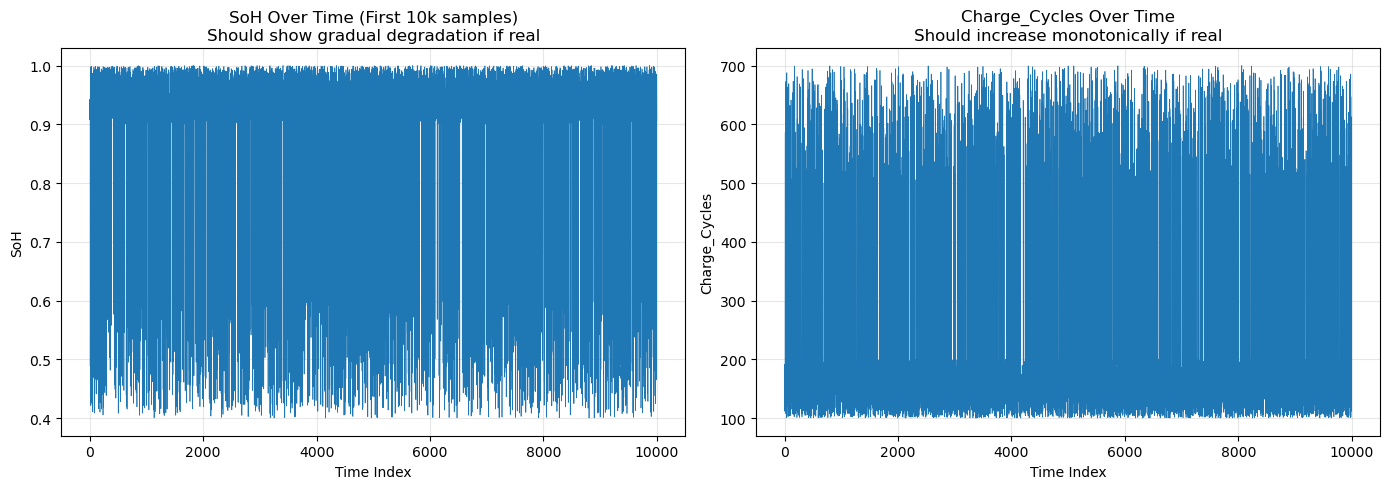

In [6]:
# Check for temporal patterns (real data should show degradation over time)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df_sorted = df.sort_values('Timestamp')

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(df_sorted.index[:10000], df_sorted['SoH'].iloc[:10000], linewidth=0.5)
plt.xlabel('Time Index')
plt.ylabel('SoH')
plt.title('SoH Over Time (First 10k samples)\nShould show gradual degradation if real')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(df_sorted.index[:10000], df_sorted['Charge_Cycles'].iloc[:10000], linewidth=0.5)
plt.xlabel('Time Index')
plt.ylabel('Charge_Cycles')
plt.title('Charge_Cycles Over Time\nShould increase monotonically if real')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [7]:
import pandas as pd

df = pd.read_csv('EV_Predictive_Maintenance_Dataset.csv')
print("First 10 rows: ")
df.head(10)

First 10 rows: 


,Timestamp,SoC,SoH,Battery_Voltage,Battery_Current,Battery_Temperature,Charge_Cycles,Motor_Temperature,Motor_Vibration,Motor_Torque,...,Load_Weight,Driving_Speed,Distance_Traveled,Idle_Time,Route_Roughness,RUL,Failure_Probability,Maintenance_Type,TTF,Component_Health_Score
0,2020-01-01 00:00:00,0.826099,0.941338,210.163881,-22.753095,27.149201,149.190930,48.496049,0.369095,113.435589,...,741.754518,103.421162,66.232383,0.520922,0.225970,260.503381,0,1,111.116697,0.852745
1,2020-01-01 00:15:00,0.064728,0.916059,364.000102,-27.701120,53.655101,171.702388,57.829492,1.449195,105.587160,...,769.134035,46.041935,3.146238,0.844005,0.204350,212.813954,0,2,179.229425,0.827616
2,2020-01-01 00:30:00,0.873643,0.908020,388.855089,-36.646406,29.559090,191.617645,46.518363,1.859045,119.610302,...,917.262931,59.588422,79.909148,0.992405,0.175125,273.394511,0,1,171.852663,0.876887
3,2020-01-01 00:45:00,0.853009,0.916476,370.570602,-37.609429,29.690283,111.881817,54.163681,0.381500,182.535625,...,600.598736,44.222285,0.774000,0.007615,0.213264,229.508442,0,0,165.221328,0.816290
4,2020-01-01 01:00:00,0.947540,0.913206,390.011904,-14.275808,28.864338,163.774377,42.075978,0.433927,173.298044,...,613.153029,41.374684,2.872124,0.771938,0.770257,257.302631,1,0,176.890659,0.744260
5,2020-01-01 01:15:00,0.993270,0.943180,382.518489,-38.870499,25.836633,134.243558,49.773682,0.471384,304.438211,...,973.564344,41.668061,1.612127,0.474666,0.271970,245.951391,0,0,166.304156,0.732834
6,2020-01-01 01:30:00,0.859527,0.908637,244.796603,-20.959500,30.066757,161.997950,43.276789,1.902244,184.879992,...,863.085305,56.136629,0.871051,0.768709,0.182309,286.391604,0,0,178.590599,0.840237
7,2020-01-01 01:45:00,0.142210,0.941402,373.584540,-18.235496,34.668815,123.777834,87.169614,1.331696,150.707053,...,559.054599,53.054266,5.098734,0.216234,0.171064,201.976791,0,0,126.753680,0.906106
8,2020-01-01 02:00:00,0.853250,0.488862,350.179623,-11.735082,32.354467,118.385038,41.569869,0.216481,161.536815,...,1541.234219,52.842360,1.263134,0.375900,0.239868,202.718924,1,0,111.043514,0.835343
9,2020-01-01 02:15:00,0.932382,0.546485,386.496281,-12.438317,56.705313,192.589392,53.086604,0.413356,167.141815,...,757.444162,40.093487,0.628933,0.040721,0.201295,299.994682,0,1,164.295570,0.767494


In [8]:
# Dataset shape and basic info

print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print("")
print("Column Names and Data Types:")
print(df.dtypes)

print("")
print("Missing Values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct.round(2)
})
print(missing_df[missing_df['Missing Count'] > 0] if missing_df['Missing Count'].sum() > 0 else "No missing values found!")

print("")
print("Duplicate Rows:")
duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {duplicates:,}")

print("")
print("Statistical Summary:")
df.describe()

Dataset Shape: 175,393 rows × 30 columns

Column Names and Data Types:
Timestamp                  object
SoC                       float64
SoH                       float64
Battery_Voltage           float64
Battery_Current           float64
Battery_Temperature       float64
Charge_Cycles             float64
Motor_Temperature         float64
Motor_Vibration           float64
Motor_Torque              float64
Motor_RPM                 float64
Power_Consumption         float64
Brake_Pad_Wear            float64
Brake_Pressure            float64
Reg_Brake_Efficiency      float64
Tire_Pressure             float64
Tire_Temperature          float64
Suspension_Load           float64
Ambient_Temperature       float64
Ambient_Humidity          float64
Load_Weight               float64
Driving_Speed             float64
Distance_Traveled         float64
Idle_Time                 float64
Route_Roughness           float64
RUL                       float64
Failure_Probability         int64
Maintenance

,SoC,SoH,Battery_Voltage,Battery_Current,Battery_Temperature,Charge_Cycles,Motor_Temperature,Motor_Vibration,Motor_Torque,Motor_RPM,...,Load_Weight,Driving_Speed,Distance_Traveled,Idle_Time,Route_Roughness,RUL,Failure_Probability,Maintenance_Type,TTF,Component_Health_Score
count,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,...,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000,175393.000000
mean,0.779882,0.882219,352.713482,-47.892493,33.399346,217.685124,56.027332,0.523942,179.786407,2235.503735,...,899.622755,58.254410,15.426523,1.554246,0.297452,216.366252,0.098818,0.498418,129.723870,0.744438
std,0.291660,0.164805,55.246513,45.358339,8.655192,164.506573,15.447305,0.434352,76.767046,1188.119583,...,384.992691,20.599544,25.663043,2.581281,0.240178,84.594382,0.298418,0.865544,55.178580,0.265023
min,0.000006,0.400001,200.001095,-199.994036,25.000010,100.000809,40.000182,0.200000,100.000039,1500.005873,...,500.001439,40.000040,0.000059,0.000005,0.100000,0.000148,0.000000,0.000000,0.000009,0.000005
25%,0.823508,0.911699,355.989733,-45.270093,27.948170,129.489301,45.872695,0.288583,129.469691,1646.972583,...,647.083997,45.906363,2.937620,0.293588,0.159248,211.700417,0.000000,0.000000,111.816152,0.735163
50%,0.882380,0.941193,370.587405,-33.518350,30.887664,158.901349,51.757365,0.376488,158.810055,1793.947006,...,793.026812,51.776604,5.881970,0.586629,0.217891,241.127447,0.000000,0.000000,141.216309,0.823212
75%,0.941148,0.970720,385.262527,-21.757595,33.826187,188.312590,57.678209,0.465118,188.025425,1941.249131,...,940.973233,57.669053,8.790443,0.882060,0.276479,270.516993,0.000000,1.000000,170.507963,0.911802
max,0.999999,0.999999,399.999314,-10.000173,59.997570,699.996920,99.999997,1.999954,399.998498,5999.999833,...,1999.971806,119.998280,99.999640,9.999459,0.999997,299.999891,1.000000,3.000000,199.998920,0.999999
